In [2]:
import json
import time
import datetime as dt
import requests
from bs4 import BeautifulSoup
from dateutil.relativedelta import relativedelta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.wait import WebDriverWait
import time

from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys

In [11]:
url = 'https://coinmarketcap.com/ko/historical/'

first_date = dt.date(2013, 4, 28)

date = first_date # start date
today = dt.date.today() # end date
date_list = []
while(date < today):
    date_list.append(date)
    date = date + relativedelta(days = 7)

date_str_list = []
for _date in date_list:
    date_str_list.append(_date.strftime("%Y%m%d"))

In [15]:
# scroll test 1
def doScrollDown(whileSeconds, driver):
    start = dt.datetime.now()
    end = start + dt.timedelta(seconds=whileSeconds)
    scroll_unit = 500
    now = 0
    while True:
        driver.execute_script('window.scrollTo(' + str(now) +  ',' + str(now+scroll_unit) + ');')
        time.sleep(1)
        now = now + scroll_unit
        if dt.datetime.now() > end:
            break

In [17]:
df = pd.DataFrame(columns = ['date', 'rank', 'name', 'symbol', 'size', 'price', 'circulating_supply', 'volume-24-h'])
columns = [['left', 'rank'], ['left', 'name'], ['left', 'symbol'], ['right', 'market-cap'], ['right', 'price'], ['right', 'circulating-supply'], ['right', 'volume-24-h']]
for date in date_str_list[-2:]:
    print(date)
    _url = url + date
    # dynamic crawling(with scroll)
    options = Options() # 브라우저를 렌더링하지 않고 메모리 상에서만 작업이 이루어지기 위한 옵션
    options.headless = True
    driver = webdriver.Chrome(executable_path='./chromedriver.exe') # , options = options)
    driver.get(_url)
    time.sleep(5)
    actions = ActionChains(driver)
    last_height = driver.execute_script("return document.body.scrollHeight")
    
    
    doScrollDown(18, driver)
#     # scroll test 2
#     while(True):
#         for _ in range(10):
#             actions.send_keys(Keys.SPACE).perform()
#             time.sleep(0.5)
#         new_height = driver.execute_script("return document.body.scrollHeight")
#         if new_height == last_height:
#             break
#         last_height = new_height
#     print("loading complete")
#     driver.execute_script("window.scrollTo(0, 0);")
#     time.sleep(3)
    
    
#     req = requests.get(_url)
#     html = req.text
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    del driver
    del options
    rows = soup.findAll('tr', {"class":"cmc-table-row"})
    data = []
    noneFlag = False
    for row in rows:
        tmp = []
        tmp.append(date)
        for col in columns:
            if col[0] == 'left':
                if col[1] != 'symbol':
                    class_name = 'cmc-table__cell cmc-table__cell--sticky cmc-table__cell--sortable cmc-table__cell--' + col[0] + ' cmc-table__cell--sort-by__' + col[1]
                else:
                    class_name = 'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--' + col[0] + ' cmc-table__cell--sort-by__' + col[1]
            elif col[0] == 'right':
                class_name = 'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--' + col[0] + ' cmc-table__cell--sort-by__' + col[1]
            r = row.find('td', {"class": class_name})
            try:
                tmp.append(r.text)
                print(r.text)
            except:
                if col[1] != 'volume-24-h':
                    noneFlag = True
                else:
                    tmp.append(None)
            if noneFlag:
                break
        if noneFlag == False:
            data.append(tmp)
    df = pd.concat([df, pd.DataFrame(data, columns = ['date', 'rank', 'name', 'symbol', 'size', 'price', 'circulating_supply', 'volume-24-h'])], ignore_index = True)

20210530
1
BTCBitcoin
BTC
₩743.97T₩743,974,270,329,996
₩39,737,333.04
18,722,300 BTC
₩35,246,546,973,114
2
ETHEthereum
ETH
₩309.06T₩309,064,170,180,191
₩2,662,257.24
116,091,024 ETH
₩28,820,677,177,207
3
USDTTether
USDT
₩68.77T₩68,767,009,033,726
₩1,113.84
61,738,511,498 USDT *
₩84,737,723,234,717
4
ADACardano
ADA
₩56.12T₩56,124,558,410,996
₩1,756.73
31,948,309,441 ADA
₩5,540,769,256,869
5
BNBBinance Coin
BNB
₩55.67T₩55,673,039,196,520
₩362,849.43
153,432,897 BNB *
₩3,615,657,605,777
6
XRPXRP
XRP
₩46.59T₩46,593,794,278,014
₩1,009.76
46,143,602,688 XRP *
₩4,540,924,157,406
7
DOGEDogecoin
DOGE
₩43.70T₩43,696,194,801,756
₩336.61
129,813,129,789 DOGE
₩2,149,523,684,803
8
USDCUSD Coin
USDC
₩24.97T₩24,972,655,920,725
₩1,113.21
22,432,927,813 USDC *
₩2,439,628,759,309
9
DOTPolkadot
DOT
₩21.51T₩21,505,528,792,451
₩22,803.37
943,085,463 DOT *
₩2,169,165,932,863
10
UNIUniswap
UNI
₩16.22T₩16,219,606,581,761
₩28,671.32
565,708,400 UNI *
₩871,045,369,442
11
ICPInternet Computer
ICP
₩15.38T₩15,384,7

103
KCSKuCoin Token
KCS
₩612.05B₩612,050,990,720
₩7,639.31
80,118,638 KCS *
₩13,929,329,923
104
VGXVoyager Token
VGX
₩577.21B₩577,207,706,138
₩2,596.58
222,295,208 VGX *
₩3,413,458,572
105
IOSTIOST
IOST
₩556.14B₩556,135,624,947
₩33.80
16,454,275,775 IOST *
₩127,860,956,993
106
BCDBitcoin Diamond
BCD
₩555.44B₩555,437,750,499
₩2,978.33
186,492,898 BCD
₩10,768,535,375
107
LPTLivepeer
LPT
₩552.50B₩552,504,499,282
₩26,105.06
21,164,655 LPT *
₩18,076,309,652
108
1INCH1inch
1INCH
₩538.72B₩538,715,015,470
₩3,214.84
167,571,524 1INCH *
₩100,860,054,213
109
QNTQuant
QNT
₩538.15B₩538,149,816,457
₩44,575.62
12,072,738 QNT *
₩5,245,727,922
110
ARArweave
AR
₩528.75B₩528,745,876,139
₩15,833.23
33,394,701 AR *
₩20,418,032,343
111
RENRen
REN
₩506.35B₩506,350,644,260
₩507.79
997,163,051 REN *
₩69,306,152,179
112
RSRReserve Rights
RSR
₩484.14B₩484,142,554,559
₩36.79
13,159,999,000 RSR *
₩50,961,220,275
113
LSKLisk
LSK
₩481.06B₩481,055,464,663
₩3,752.88
128,182,999 LSK *
₩31,598,405,615
114
SKLSKALE Netwo

1
BTCBitcoin
BTC
₩748.09T₩748,093,305,243,299
₩39,943,873.32
18,728,612 BTC
₩32,204,077,956,916
2
ETHEthereum
ETH
₩351.36T₩351,355,729,314,364
₩3,024,097.23
116,185,328 ETH
₩28,192,355,956,486
3
USDTTether
USDT
₩69.39T₩69,388,707,982,900
₩1,114.75
62,246,255,385 USDT *
₩60,267,090,973,103
4
BNBBinance Coin
BNB
₩67.30T₩67,301,940,062,509
₩438,640.87
153,432,897 BNB *
₩2,341,136,808,204
5
ADACardano
ADA
₩59.72T₩59,719,365,889,170
₩1,869.25
31,948,309,441 ADA
₩1,946,990,652,074
6
DOGEDogecoin
DOGE
₩53.80T₩53,799,374,959,579
₩414.12
129,911,764,841 DOGE
₩2,045,636,073,180
7
XRPXRP
XRP
₩48.59T₩48,590,984,365,267
₩1,052.87
46,151,013,329 XRP *
₩2,570,943,816,625
8
USDCUSD Coin
USDC
₩25.62T₩25,621,567,950,052
₩1,114.45
22,990,271,580 USDC *
₩1,540,554,184,488
9
DOTPolkadot
DOT
₩25.49T₩25,485,838,662,057
₩26,955.98
945,461,319 DOT *
₩1,322,786,152,397
10
UNIUniswap
UNI
₩16.31T₩16,305,918,184,090
₩28,861.58
564,969,717 UNI *
₩371,328,806,582
11
ICPInternet Computer
ICP
₩14.46T₩14,457,227,832,50

293,763,596 WRX *
₩43,857,445,267
114
KNCKyber Network Crystal Legacy
KNC
₩550.29B₩550,293,980,809
₩2,683.77
205,045,092 KNC *
₩132,408,837,305
115
RSRReserve Rights
RSR
₩548.96B₩548,957,191,399
₩41.71
13,159,999,000 RSR *
₩45,657,321,968
116
BCDBitcoin Diamond
BCD
₩541.34B₩541,340,523,797
₩2,902.74
186,492,898 BCD
₩8,767,155,488
117
LSKLisk
LSK
₩501.76B₩501,757,627,034
₩3,912.54
128,243,470 LSK *
₩30,070,565,927
118
LRCLoopring
LRC
₩485.27B₩485,269,471,835
₩396.00
1,225,423,784 LRC *
₩25,732,665,786
119
WINWINkLink
WIN
₩436.35B₩436,353,596,956
₩0.5694
766,299,999,999 WIN *
₩24,689,939,149
120
RLCiExec RLC
RLC
₩420.96B₩420,958,382,405
₩5,257.33
80,070,793 RLC *
₩19,981,807,174
121
GTGateToken
GT
₩418.07B₩418,073,986,850
₩5,271.89
79,302,529 GT *
₩11,887,554,067
122
SKLSKALE Network
SKL
₩408.55B₩408,553,900,652
₩426.09
958,853,025 SKL *
₩64,666,578,391
123
DENTDent
DENT
₩406.13B₩406,128,325,861
₩4.13
98,261,255,759 DENT *
₩20,412,698,066
124
USDNNeutrino USD
USDN
₩402.42B₩402,421,739,72

In [29]:
df.to_excel('./data_preprocessed')

,date,rank,name,symbol,size,price,circulating_supply,volume-24-h
0,20210523,1,BTCBitcoin,BTC,"₩727.03T₩727,027,912,528,319","₩38,850,035.67","18,713,700 BTC","₩87,675,666,909,091"
1,20210523,2,ETHEthereum,ETH,"₩273.41T₩273,414,860,952,768","₩2,357,085.90","115,996,986 ETH","₩62,576,582,554,615"
2,20210523,3,USDTTether,USDT,"₩66.52T₩66,518,658,627,725","₩1,119.19","59,434,391,387 USDT *","₩185,875,344,486,202"
3,20210523,4,ADACardano,ADA,"₩47.31T₩47,313,625,080,267","₩1,480.94","31,948,309,441 ADA","₩10,388,497,037,604"
4,20210523,5,BNBBinance Coin,BNB,"₩45.08T₩45,077,929,048,453","₩293,795.72","153,432,897 BNB *","₩5,962,306,345,196"
5,20210523,6,DOGEDogecoin,DOGE,"₩44.65T₩44,652,103,739,292",₩344.21,"129,721,566,471 DOGE","₩7,981,660,460,089"
6,20210523,7,XRPXRP,XRP,"₩41.08T₩41,084,702,871,604",₩890.53,"46,135,372,183 XRP *","₩12,085,045,920,380"
7,20210523,8,ICPInternet Computer,ICP,"₩20.03T₩20,027,538,466,300","₩161,577.98","123,949,678 ICP *","₩683,256,005,512"
8,20210523,9,DOTPolkadot,DOT,"₩18.94T₩18,938,543,259,610","₩20,144.74","940,123,359 DOT *","₩6,707,143,207,834"
9,20210523,10,USDCUSD Coin,USDC,"₩16.07T₩16,074,083,271,681","₩1,117.80","14,380,157,844 USDC *","₩5,778,752,470,990"


# Data Preprocessing

In [3]:
df = pd.read_excel('./crawling_data_20210609.xlsx')

In [4]:
df[df['volume-24-h'] == '₩?']

,Unnamed: 0,date,rank,name,symbol,size,price,circulating_supply,volume-24-h
1779,1779,20140216,1,BTCBitcoin,BTC,"₩7.65B₩7,650,358,897",₩616.63,"12,406,725 BTC",₩?
1780,1780,20140216,2,LTCLitecoin,LTC,"₩391.93M₩391,928,398",₩15.20,"25,776,504 LTC",₩?
1781,1781,20140216,3,XRPXRP,XRP,"₩119.91M₩119,913,225",₩0.01534,"7,817,889,792 XRP *",₩?
1782,1782,20140216,4,PPCPeercoin,PPC,"₩83.37M₩83,374,178",₩3.94,"21,154,750 PPC",₩?
1783,1783,20140216,5,DOGEDogecoin,DOGE,"₩71.89M₩71,890,532",₩0.001413,"50,877,566,976 DOGE",₩?
1784,1784,20140216,6,NXTNxt,NXT,"₩57.43M₩57,427,542",₩0.05743,"999,998,016 NXT *",₩?
1785,1785,20140216,7,OMNIOmni,OMNI,"₩41.10M₩41,102,057",₩66.35,"619,478 OMNI *",₩?
1786,1786,20140216,8,NMCNamecoin,NMC,"₩29.68M₩29,679,609",₩3.69,"8,051,393 NMC",₩?
1787,1787,20140216,9,XCPCounterparty,XCP,"₩24.52M₩24,517,503",₩9.26,"2,648,756 XCP *",₩?
1788,1788,20140216,10,QRKQuark,QRK,"₩16.95M₩16,952,553",₩0.06848,"247,566,256 QRK",₩?


In [7]:
df['volume-24-h'] = df['volume-24-h'].apply(lambda x: np.nan if x=='₩?' else x)

df.dropna(axis = 0, inplace = True)

df['date'] = pd.to_datetime(df['date'], format = "%Y%m%d")

df['size'] = df['size'].apply(lambda x: float(x.split('₩')[-1].replace(',', '')))

tmp = df['symbol'].apply(lambda x: str(len(x)))
df['name'] = df['name'] + tmp
df['name'] = df['name'].apply(lambda x: x[int(x[-1]):-1])

df['price'] = df['price'].apply(lambda x : float(x.split('₩')[-1].replace(',','')))

df['circulating_supply'] = df['circulating_supply'].apply(lambda x : int(x.split()[0].replace(',','')))

df['volume-24-h'] = df['volume-24-h'].apply(lambda x: x.replace('₩','').replace(',',''))

df['volume-24-h']= pd.to_numeric(df['volume-24-h'])

df.dropna(axis = 0, inplace = True)

df.reset_index(drop = True, inplace = True)
df = df.iloc[:,1:]

In [21]:
df[df['date']=='2021-05-23'].head()

,date,rank,name,symbol,size,price,circulating_supply,volume-24-h
74662,2021-05-23,21,THETA,THETA,6.661757e+12,6661.76,1000000000,8.329155e+11
74663,2021-05-23,22,VeChain,VET,6.241290e+12,97.04,64315576989,2.161512e+12
74664,2021-05-23,23,Filecoin,FIL,5.339124e+12,72674.71,73466045,1.938917e+12
74665,2021-05-23,24,TRON,TRX,5.053811e+12,70.53,71659657369,2.579836e+12
74666,2021-05-23,25,Dai,DAI,4.743366e+12,1118.27,4241687762,1.664084e+12


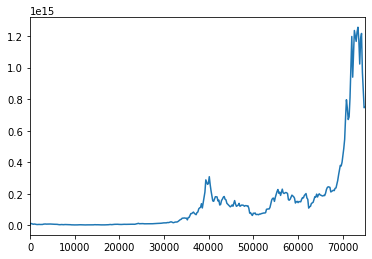

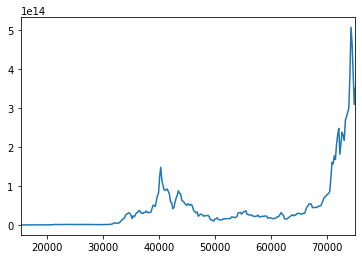

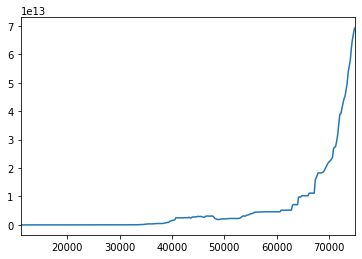

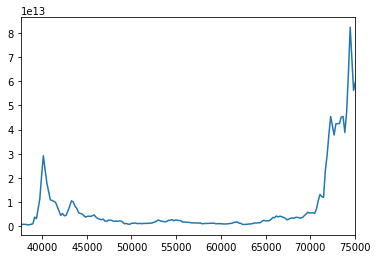

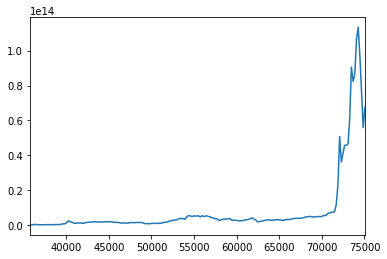

In [22]:
df[df['symbol'] == 'BTC']['size'].plot()
plt.show()
df[df['symbol'] == 'ETH']['size'].plot()
plt.show()
df[df['symbol'] == 'USDT']['size'].plot()
plt.show()
df[df['symbol'] == 'ADA']['size'].plot()
plt.show()
df[df['symbol'] == 'BNB']['size'].plot()
plt.show()

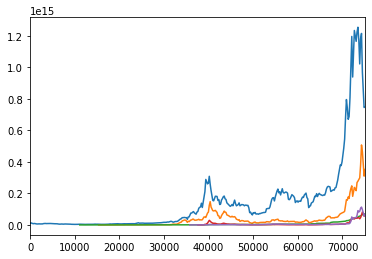

In [23]:
df[df['symbol'] == 'BTC']['size'].plot()
df[df['symbol'] == 'ETH']['size'].plot()
df[df['symbol'] == 'USDT']['size'].plot()
df[df['symbol'] == 'ADA']['size'].plot()
df[df['symbol'] == 'BNB']['size'].plot()
plt.show()

In [78]:
df.to_csv('./data_preprocessed.csv', index = False)

# data checking

In [79]:
data = pd.read_csv('./data_preprocessed.csv')

In [81]:
data.describe()

,rank,size,price,circulating_supply,volume-24-h
count,77447.000000,7.744700e+04,7.744700e+04,7.744700e+04,7.578200e+04
mean,98.512919,1.184385e+12,1.491767e+05,3.625716e+10,2.258672e+11
std,58.139854,1.955672e+13,3.118392e+06,3.333753e+12,3.164332e+12
min,1.000000,0.000000e+00,1.227000e-05,0.000000e+00,4.870000e-11
25%,47.000000,3.922872e+08,9.640000e+00,1.252286e+07,1.889922e+06
50%,98.000000,2.505111e+10,1.162300e+02,8.837740e+07,2.341448e+08
75%,149.000000,1.103020e+11,1.119465e+03,7.000427e+08,5.444999e+09
max,200.000000,1.256690e+15,4.253472e+08,4.868670e+14,2.530446e+14


In [82]:
data.head()

,date,rank,name,symbol,size,price,circulating_supply,volume-24-h
0,2013-04-28,1,Bitcoin,BTC,1.663073e+12,149943.59,11091325,NaN
1,2013-04-28,2,Litecoin,LTC,8.338679e+10,4858.17,17164230,NaN
2,2013-04-28,3,Peercoin,PPC,8.100133e+09,431.84,18757362,NaN
3,2013-04-28,4,Namecoin,NMC,6.698914e+09,1237.03,5415300,NaN
4,2013-04-28,5,Terracoin,TRC,1.679309e+09,722.73,2323570,NaN


In [83]:
data.tail()

,date,rank,name,symbol,size,price,circulating_supply,volume-24-h
77442,2021-05-30,196,Metadium,META,1.556353e+11,124.97,1245430304,5.874952e+08
77443,2021-05-30,197,Travala.com,AVA,1.517516e+11,3051.79,49725503,4.662979e+09
77444,2021-05-30,198,Syscoin,SYS,1.529357e+11,249.55,612843612,1.235756e+09
77445,2021-05-30,199,aelf,ELF,1.523926e+11,279.89,544480200,1.830676e+10
77446,2021-05-30,200,Utrust,UTK,1.478473e+11,328.55,450000000,1.177220e+10
